In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/email.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [4]:
df['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

In [5]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [6]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
y = df['label']
X = df[['text']]

In [8]:

# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head()

,text
5132,Subject: april activity surveys\r\nwe are star...
2067,Subject: message subject\r\nhey i ' am julie ^...
4716,Subject: txu fuels / sds nomination for may 20...
4710,Subject: re : richardson volumes nov 99 and de...
2268,Subject: a new era of online medical care .\r\...


In [10]:
X_train.shape

(4136, 1)

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [13]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [15]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [16]:
# !pip install tqdm

In [17]:

from tqdm import tqdm, tqdm_notebook

In [18]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [19]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:39<00:00, 25.89it/s]


,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [20]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [21]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36


In [22]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4136/4136 [02:48<00:00, 24.57it/s]


,0,1
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [23]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [24]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [25]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [26]:
from wordcloud import WordCloud

In [27]:
y_train


5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object

In [28]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36
4998,Subject: sparkasse security issue\r\nsehr geeh...,subject sparkass secur issu sehr geehrt kundin...,132,subject sparkasse security issue sehr geehrte ...,132
366,Subject: druuugs onliiiiine very cheaaaap\r\nh...,subject druuug onliiiiin cheaaaap hello calvin...,50,subject druuugs onliiiiine cheaaaap hello calv...,50
2683,Subject: survivor junction\r\na genuine colleg...,subject survivor junction genuin colleg degre ...,139,subject survivor junction genuine college degr...,139


In [29]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

subject message subject hey julie turned high school senior houston tx waiting long time day finally


In [30]:
spam_df = X_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [31]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

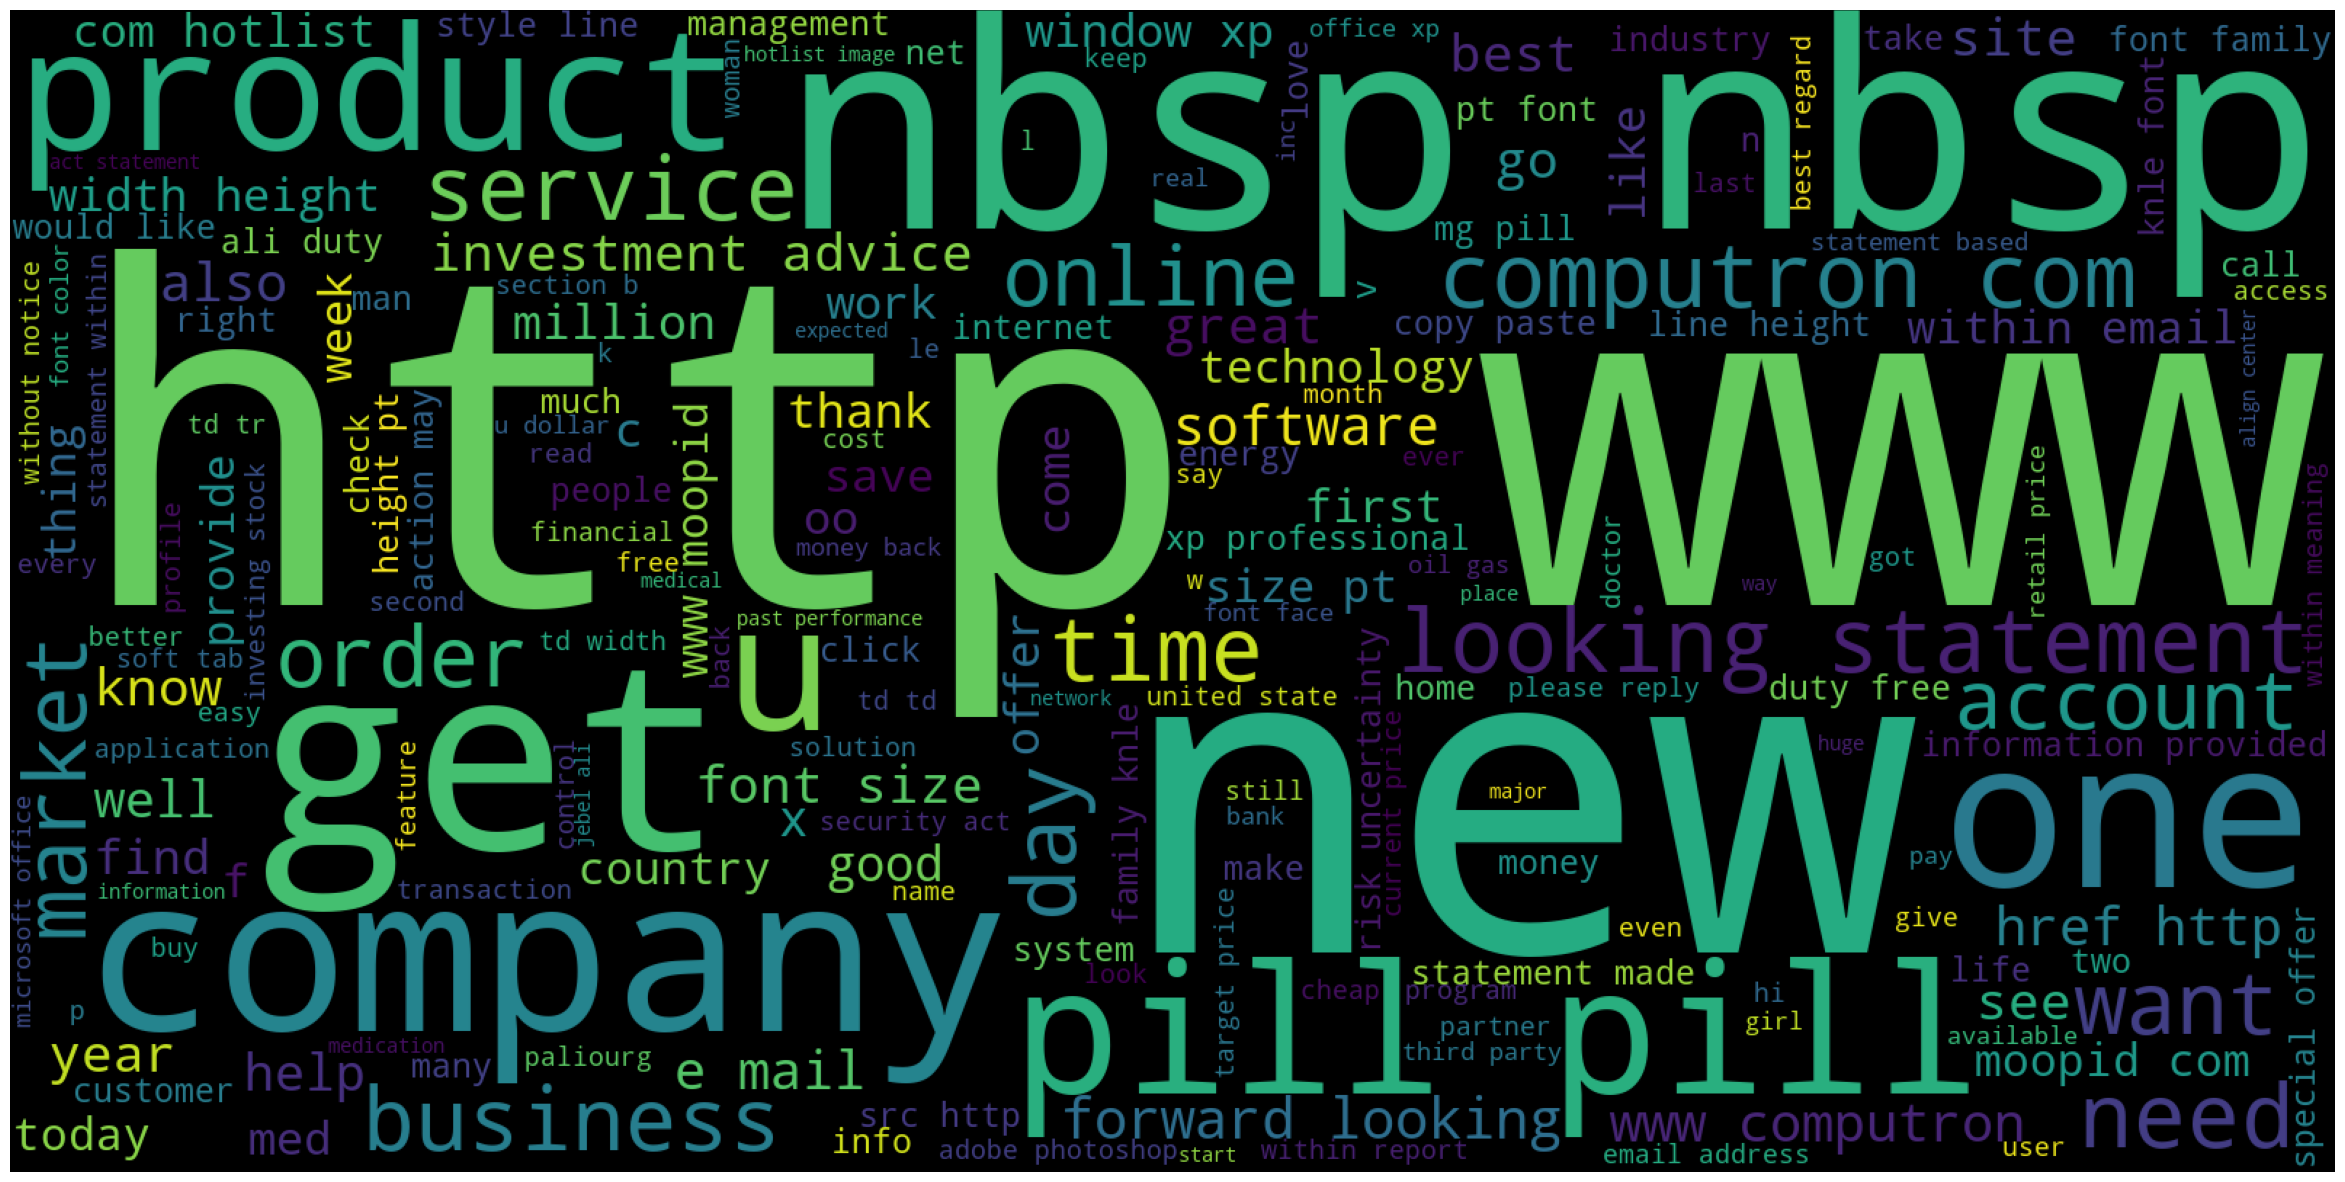

In [32]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [33]:
ham_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

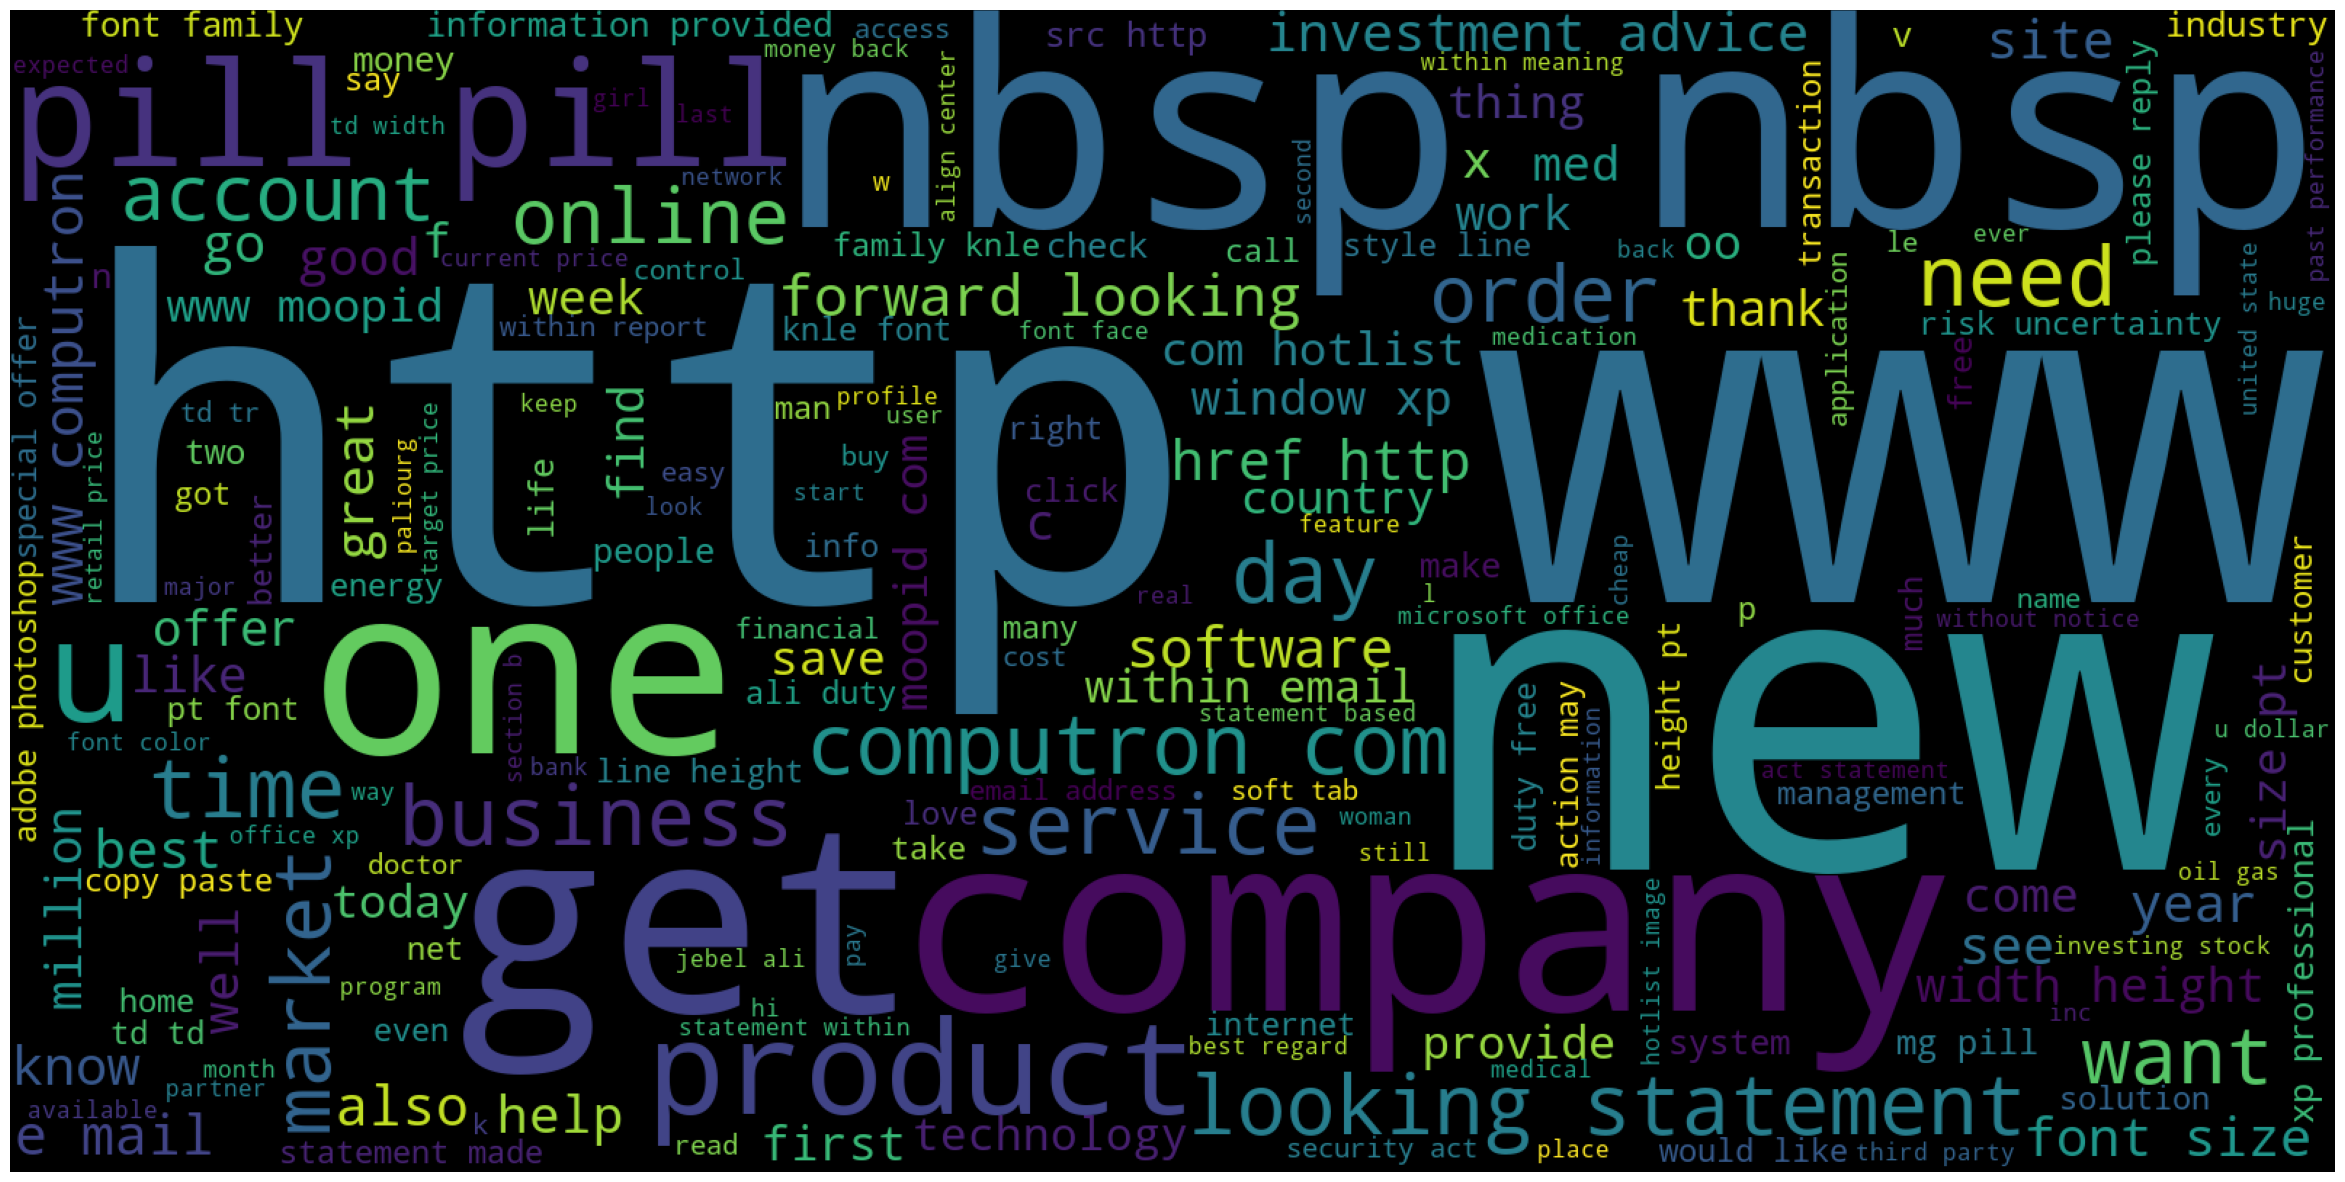

In [34]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

## Converting Text to Numerical vectors - BOW Representation
- Step 1 - Learn the vocabulary from the train data
- Step 2 - Transform the train['emails'] to X_train (i.e. DTM)
- Step 3 - Transform the test['emails'] to X_test (i.e. DTM)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [36]:
X_train_bow

<4136x38693 sparse matrix of type '<class 'numpy.int64'>'
	with 252668 stored elements in Compressed Sparse Row format>

In [37]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 38693
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of input data: (4136, 38693)


In [38]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 Bytes


In [40]:
from sys import getsizeof

print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()), "Bytes")

<class 'numpy.ndarray'>
1280274112 Bytes


## Preprocessing the Test Data

In [41]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1035/1035 [00:39<00:00, 26.08it/s]


,0,1
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [42]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [43]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241


In [44]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [46]:
y_test_pred = classifier.predict(X_test_bow)
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9826086956521739
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       742
        spam       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



## Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [48]:
y_test_pred = classifier.predict(X_test_bow)
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9516908212560387
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       742
        spam       0.90      0.94      0.92       293

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

RandomForestClassifier()

In [51]:
y_test_pred = classifier.predict(X_test_bow)
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9748792270531401
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       742
        spam       0.94      0.98      0.96       293

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.98      0.97      0.98      1035

